In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('./Fluorescence data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Col_n            1976 non-null   int64  
 1   Time             1976 non-null   int64  
 2   Well             1976 non-null   object 
 3   Fluo             1976 non-null   float64
 4   Element          1976 non-null   object 
 5   Seq              1976 non-null   object 
 6   OD600            1976 non-null   float64
 7   FvOD             1976 non-null   float64
 8   Fluorescence FC  1823 non-null   float64
 9   OD FC            1824 non-null   float64
 10  FvOD FC          1823 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 169.9+ KB


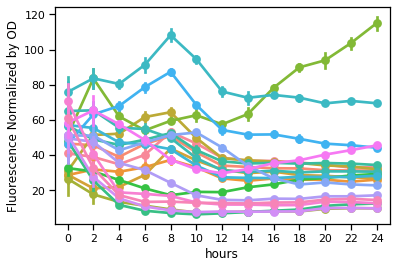

In [2]:
var = np.random.random(len(df))
var = var /2
jittered = df['Time'] + var

sns.set_context('notebook')
g = sns.pointplot(data = df.loc[df['Element'] == 'Promoter'], 
                  x = 'Time', y = 'FvOD', alpha = 0.4, ci = 'sd', hue = 'Seq', legend = False )
g.set(xlabel= 'hours', ylabel = 'Fluorescence Normalized by OD')
plt.legend().remove()


<Figure size 720x720 with 0 Axes>

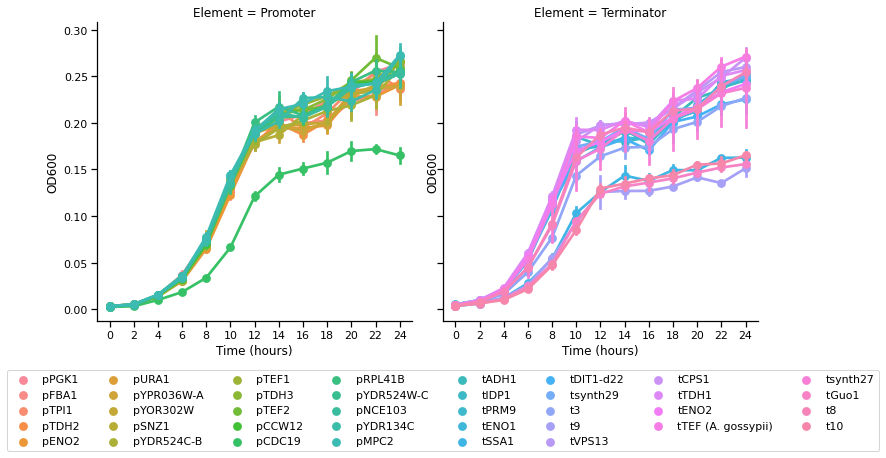

In [3]:
plt.figure(figsize=(10, 10))
sns.set_context('notebook')
g = sns.catplot( data= df, x = 'Time', y = 'OD600', col = 'Element', 
                alpha = 0.4, legend=None, ci = 'sd', hue = 'Seq', kind = 'point')
plt.subplots_adjust( wspace=0.1)
g.set(ylabel = 'OD600', xlabel = 'Time (hours)') # change labels
plt.legend(loc = 'center',  ncol = 8, bbox_to_anchor= (0, -0.3)) # where to insert legend

plt.show()

<Figure size 720x720 with 0 Axes>

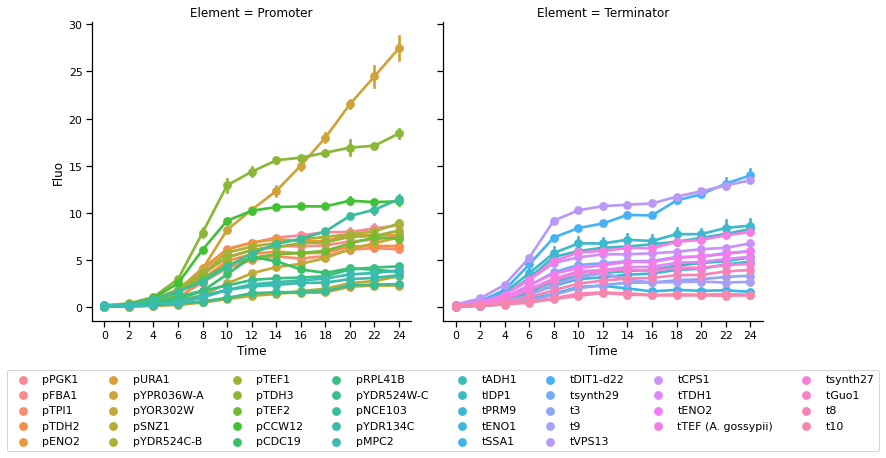

In [4]:
plt.figure(figsize=(10, 10))
sns.set_context('notebook')
g = sns.catplot( data= df, x = 'Time', y = 'Fluo', col = 'Element', alpha = 0.4, 
                ci = 'sd', kind = 'point', hue = 'Seq', legend= None)

plt.subplots_adjust( wspace=0.1)
plt.legend(loc = 'center',  ncol = 8, bbox_to_anchor= (0, -0.3))

plt.show()

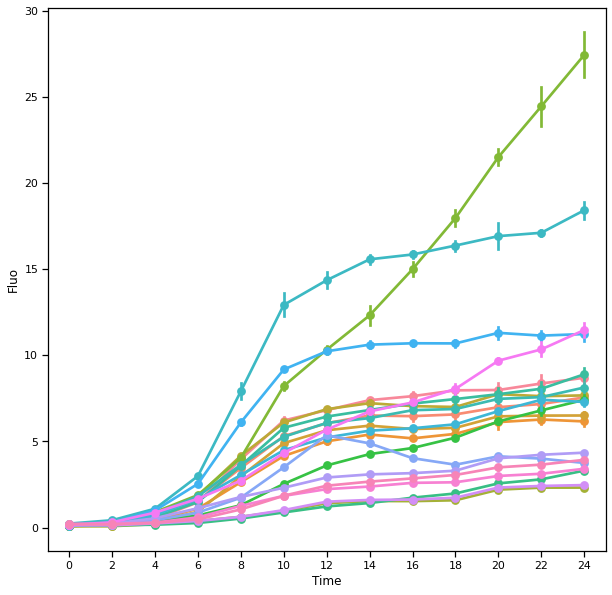

In [5]:
plt.figure(figsize=(10, 10))
g = sns.pointplot( data= df.loc[df['Element'] == 'Promoter'], x = 'Time', y = 'Fluo', col = 'Element', alpha = 0.4, 
                ci = 'sd', kind = 'point', hue = 'Seq', legend= None)
plt.legend().remove()

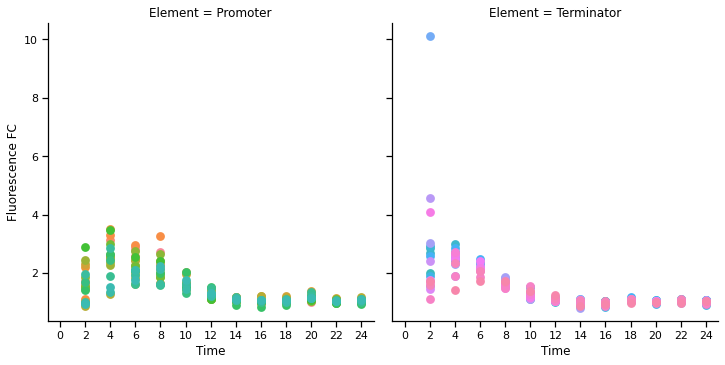

In [6]:
#Fluorescence change
sns.set_context('notebook')
g = sns.catplot( data= df, x = 'Time', y = 'Fluorescence FC', col = 'Element', ci = None, 
                kind = 'point', hue = 'Seq', legend= None, join = False)


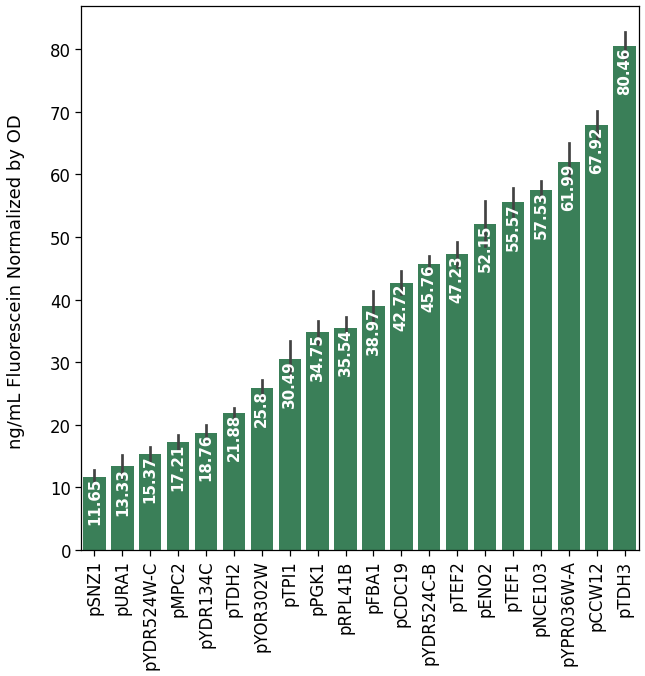

In [7]:
#FvOD for Promoters, Time selected based on Fluorescence Fold-change plot
a = df.loc[ (df['Element'] == 'Promoter') & 
                 (df['Time'] == 4)].groupby(['Seq']).mean().round(2).sort_values('FvOD')

ordered = a.index
val = a['FvOD']


sns.set_context('notebook', font_scale= 1.5)
plt.figure(figsize=(10, 10))
g = sns.barplot(data= df.loc[ (df['Element'] == 'Promoter') & (df['Time'] == 4)] , 
                x = 'Seq', y = 'FvOD', order = ordered, color= 'seagreen', ci = 'sd')

for i in range(len(df.loc[df['Element'] == 'Promoter', 'Seq'].unique())):
    plt.text(i, (val[i]-0.05) , val[i], ha = 'center', size = 15, rotation = 90, weight = 'bold',
         va = 'top', color = 'white')

plt.setp(g.get_xticklabels(), rotation=90, ha = 'center')
plt.xlabel('')
plt.ylabel('ng/mL Fluorescein Normalized by OD \n')

plt.show()

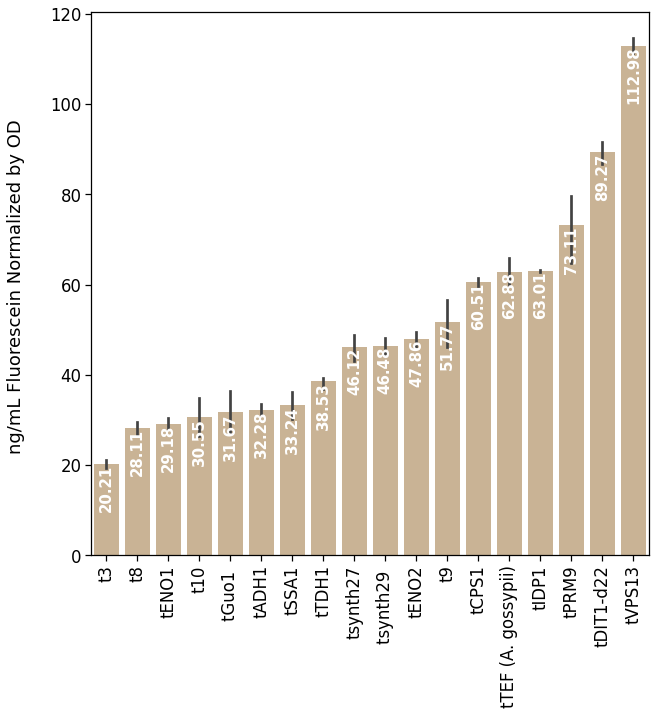

In [8]:
#FvOD for Terminators, Time selected based on Fluorescence Fold-change plot
a = df.loc[ (df['Element'] == 'Terminator') & 
                 (df['Time'] == 4)].groupby(['Seq']).mean().round(2).sort_values('FvOD')

ordered = a.index
val = a['FvOD']

sns.set_context('notebook', font_scale= 1.5)
plt.figure(figsize=(10, 10))

g = sns.barplot(data= df.loc[ (df['Element'] == 'Terminator') & (df['Time'] == 4)] , 
                x = 'Seq', y = 'FvOD', order = ordered, color = 'tan')

for i in range(len(df.loc[df['Element'] == 'Terminator', 'Seq'].unique())):
    plt.text(i, (val[i]-0.08) , val[i], ha = 'center', size = 15, rotation = 90, weight = 'bold',
         va = 'top', color = 'white')


plt.setp(g.get_xticklabels(), rotation=90, ha = 'center')
plt.xlabel('')
plt.ylabel('ng/mL Fluorescein Normalized by OD \n')

plt.show()

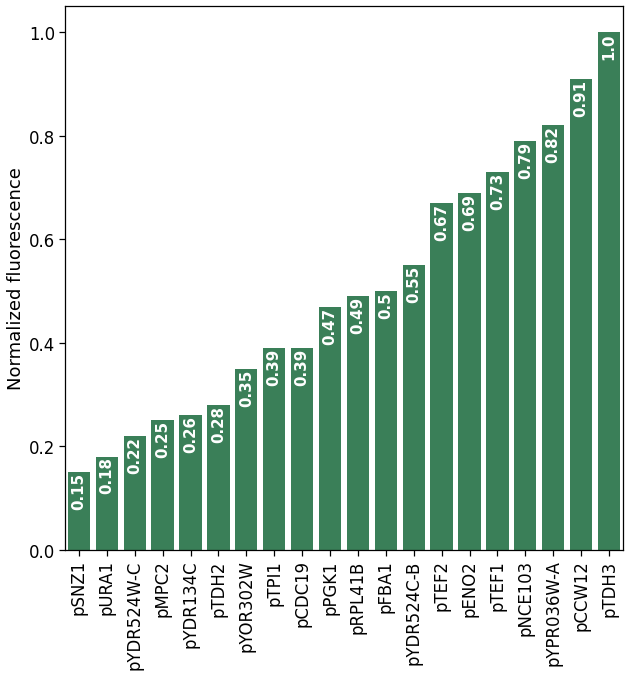

In [9]:
N = df.loc[ (df['Element'] == 'Promoter') & 
                 (df['Time'] == 4)].groupby('Seq', as_index = False).mean()

N['Normalized fluorescence'] = N.Fluo /N.Fluo.max()
N['Normalized fluorescence'] = N['Normalized fluorescence'].round(2)

ordered = N.sort_values('Normalized fluorescence').Seq
val = N.sort_values('Normalized fluorescence')['Normalized fluorescence'].reset_index(drop = True)


sns.set_context('notebook', font_scale=1.5)
plt.figure(figsize=(10, 10))
g = sns.barplot(data=N , 
                x = 'Seq', y = 'Normalized fluorescence', order = ordered, color= 'seagreen')


for i in range(len(N.Seq)):
    plt.text(i, val[i] , val[i], ha = 'center', size = 15, rotation = 90, color = 'white', weight = 'bold',
         va = 'top')


plt.setp(g.get_xticklabels(), rotation=90, ha = 'center')
plt.xlabel('')

plt.show()



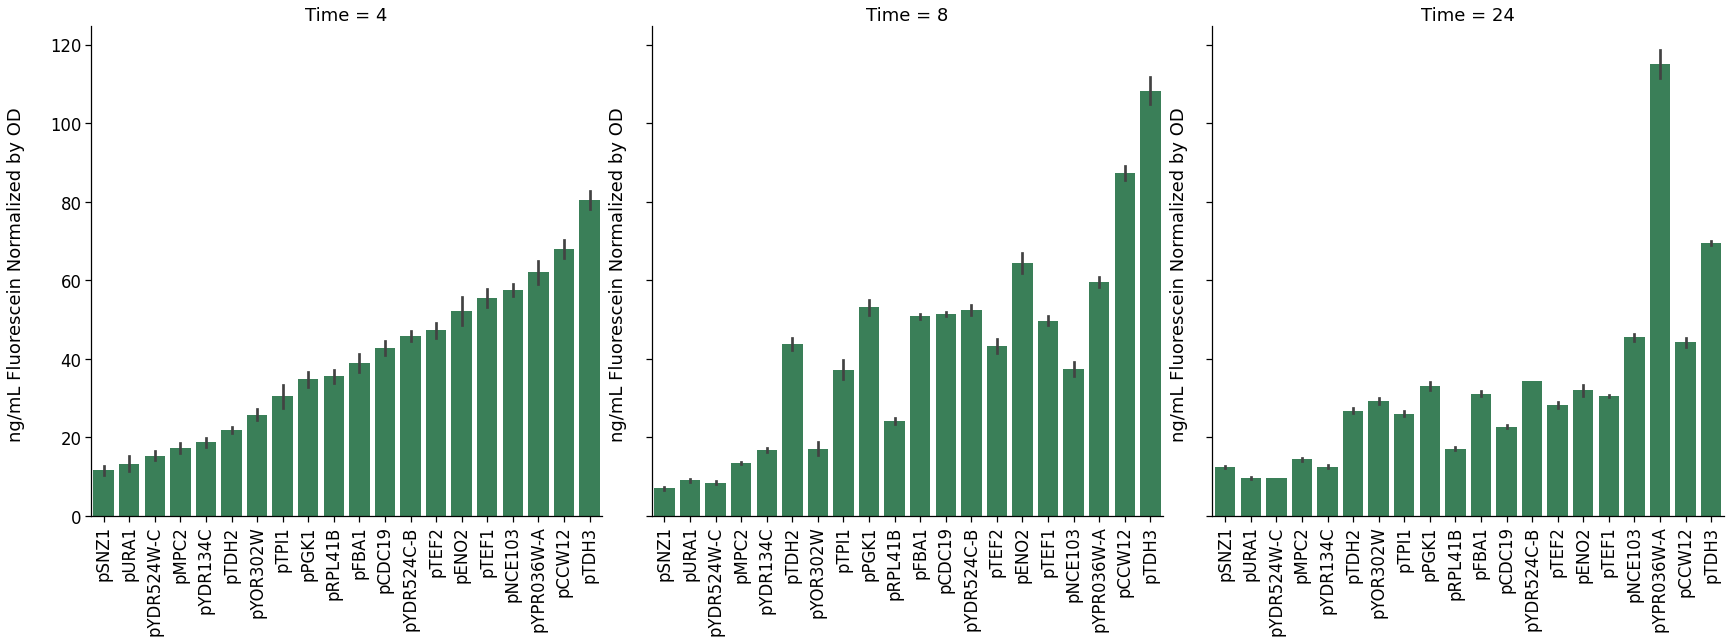

In [10]:
Time_points = df.loc[df['Time'].isin([4, 8, 24])]
a = Time_points.loc[ (Time_points['Element'] == 'Promoter') & 
                 (Time_points['Time'] == 4)].groupby(['Seq']).mean().round(2).sort_values('FvOD')

ordered = a.index

sns.set_context('notebook', font_scale=1.5)

g = sns.catplot(data= Time_points.loc[df['Element'] == 'Promoter'] , 
                x = 'Seq', y = 'FvOD', order = ordered, color= 'seagreen', kind = 'bar', ci = 'sd',
               col = 'Time', height= 8)

g.set(ylabel =('ng/mL Fluorescein Normalized by OD \n'))

for i in g.axes.flat:
    plt.setp(i.get_xticklabels(), rotation=90, ha = 'center')
    i.set(xlabel = None)




[Text(0.5, 0, '')]

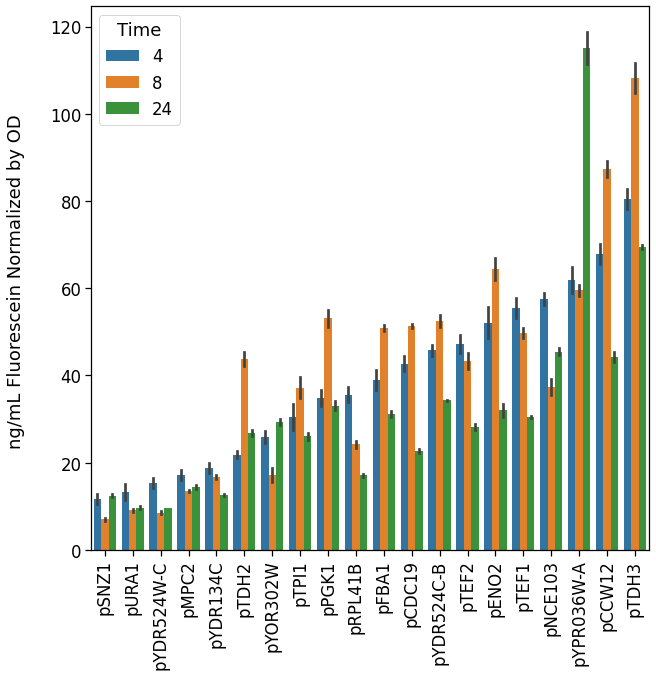

In [11]:
sns.set_context('notebook', font_scale=1.5)

plt.figure(figsize=(10,10))
g = sns.barplot(data= Time_points.loc[df['Element'] == 'Promoter'] , 
                x = 'Seq', y = 'FvOD', order = ordered, hue= 'Time', ci = 'sd')

g.set(ylabel = 'ng/mL Fluorescein Normalized by OD \n')


plt.setp(g.get_xticklabels(), rotation=90, ha = 'center')
g.set(xlabel = None)
